# Superparamagnetic Network - Machine Learning Testing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants
import random as rnd

import SP_anisotropy_class as SPN

#3D plotting
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

## The SP Network

$e = \frac{E}{KV}$, $H_K = \frac{2K}{\mu_0M_S}$, $h=\frac{H}{H_K}$, $k_\sigma=\frac{K_\sigma}{K}$, $\omega'=\frac{\omega}{f_0}$ and $\beta'=\frac{KV}{k_BT}$

$h=0.4$

$\theta_H=90°$

$\phi=45°$

$\beta'=10$

The system is at equilibrium with $k_\sigma=0$ and we instantly set $k_\sigma=1$.

$f_0=10^{10}Hz$

We call the characteristic memory time scale $T$.

In [2]:
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 10
spn = SPN.SP_Network(h,theta_H,k_s_0,phi,beta_prime)

f0 = 1e10

In [3]:
spn.k_s = 1
SPN.calculate_energy_barriers(spn)
T = 1./(spn.get_omega_prime()*f0) #Characteristic memory time
t_step = T/100 #We take a t_step 100 times smaller than T
time = np.arange(0,5*T,t_step) #We want to see 5 T
m_t = [spn.get_m()]

for i in range(len(time)-1):
    spn.evolve(f0,t_step)
    m_t.append(spn.get_m())

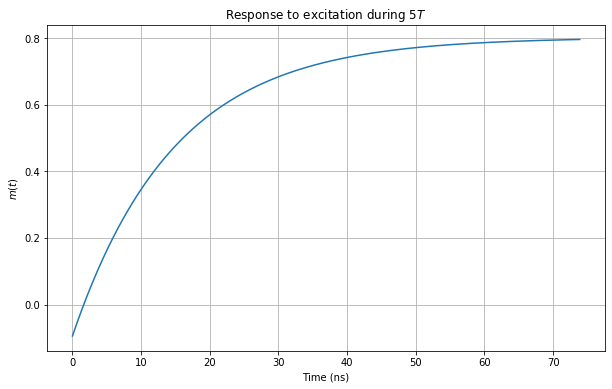

In [4]:
plt.figure(figsize=(10,6))
plt.plot(time*1e9,m_t)
plt.grid(True)
plt.title("Response to excitation during 5"+r'$T$')
plt.ylabel(r'$m(t)$')
plt.xlabel("Time (ns)")
plt.show()

Now let's use a random signal as input.

In [5]:
def rnd_signal(n):
    signal = []
    for i in range(n):
        signal.append(2*rnd.random()-1)
    return(signal)

In [6]:
spn = SPN.SP_Network(h,theta_H,k_s_0,phi,beta_prime)
SPN.calculate_energy_barriers(spn)
T = 1./(spn.get_omega_prime()*f0)

n = 10 #Number of inputs
N = 100 #Number of steps per input
theta = T #Duration of each input
t_step = theta/N #We take a t_step 100 times smaller than theta
signal = rnd_signal(n) #Input signal
time_signal = np.arange(n)*theta
time = np.linspace(0,n*theta,n*N)

m_t = []

for i in range(n):
    m_t.append(spn.get_m())
    spn.k_s = signal[i]
    SPN.calculate_energy_barriers(spn)
    for j in range(N-1):
        spn.evolve(f0,t_step)
        m_t.append(spn.get_m())

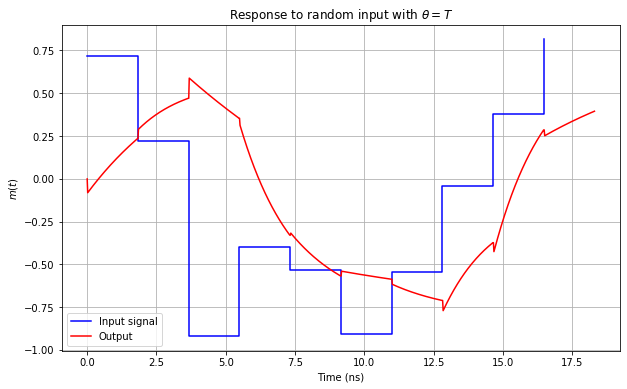

In [7]:
plt.figure(figsize=(10,6))
plt.plot(time_signal*1e9,signal,'b-',drawstyle='steps-post',label="Input signal")
plt.plot(time*1e9,m_t,'r-',label="Output")
plt.grid(True)
plt.legend(loc="best")
plt.title("Response to random input with "+r'$\theta=T$')
plt.ylabel(r'$m(t)$')
plt.xlabel("Time (ns)")
plt.show()
plt.show()

In [8]:
spn = SPN.SP_Network(h,theta_H,k_s_0,phi,beta_prime)
SPN.calculate_energy_barriers(spn)
T = 1./(spn.get_omega_prime()*f0)

n = 10 #Number of inputs
N = 100 #Number of steps per input
theta = T/10 #Duration of each input
t_step = theta/N #We take a t_step 100 times smaller than theta
signal = rnd_signal(n) #Input signal
time_signal = np.arange(n)*theta
time = np.linspace(0,n*theta,n*N)

m_t = []

for i in range(n):
    m_t.append(spn.get_m())
    spn.k_s = signal[i]
    SPN.calculate_energy_barriers(spn)
    for j in range(N-1):
        spn.evolve(f0,t_step)
        m_t.append(spn.get_m())

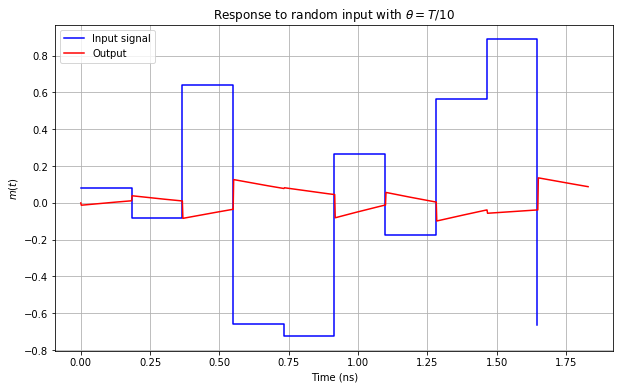

In [9]:
plt.figure(figsize=(10,6))
plt.plot(time_signal*1e9,signal,'b-',drawstyle='steps-post',label="Input signal")
plt.plot(time*1e9,m_t,'r-',label="Output")
plt.grid(True)
plt.legend(loc="best")
plt.title("Response to random input with "+r'$\theta=T/10$')
plt.ylabel(r'$m(t)$')
plt.xlabel("Time (ns)")
plt.show()
plt.show()

In [10]:
spn = SPN.SP_Network(h,theta_H,k_s_0,phi,beta_prime)
SPN.calculate_energy_barriers(spn)
T = 1./(spn.get_omega_prime()*f0)

n = 10 #Number of inputs
N = 100 #Number of steps per input
theta = T*10 #Duration of each input
t_step = theta/N #We take a t_step 100 times smaller than tau_signal
signal = rnd_signal(n) #Input signal
time_signal = np.arange(n)*theta
time = np.linspace(0,n*theta,n*N)

m_t = []

for i in range(n):
    m_t.append(spn.get_m())
    spn.k_s = signal[i]
    SPN.calculate_energy_barriers(spn)
    for j in range(N-1):
        spn.evolve(f0,t_step)
        m_t.append(spn.get_m())

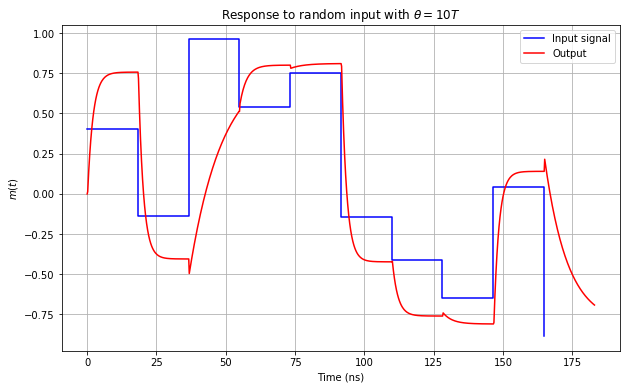

In [11]:
plt.figure(figsize=(10,6))
plt.plot(time_signal*1e9,signal,'b-',drawstyle='steps-post',label="Input signal")
plt.plot(time*1e9,m_t,'r-',label="Output")
plt.grid(True)
plt.legend(loc="best")
plt.title("Response to random input with "+r'$\theta=10T$')
plt.ylabel(r'$m(t)$')
plt.xlabel("Time (ns)")
plt.show()
plt.show()

## Towards Machine Learning

In [2]:
#Ignore the first 50 elements of the output
spacer = 50

In [3]:
def Ridge_regression(S, Y, alpha):
    '''
    For a linear layer we can solve the weights by a direct method
    If the error function is the mean square error given by
        E = |Y - S * W |^2 + \alpha |W|^2
    where the L2 norm is being applied and the variables are
        Y = [Nsamples x Noutputs] is the desired output
        S = [Nsamples x Nweights] is the input signal
        W = [Nweights x Noutputs] is the weight matrix
    To minimise E we need to solve:
        S^T * Y = (S^T * S  + \alpha I) * W
        W = (S^T*S + \alpha I)^-1 * S^T * Y
    '''
    STS = np.matmul(S.T, S)
    STY = np.matmul(S.T, Y)
    Sdag = np.linalg.pinv(STS + alpha*np.eye(len(STS)))
    return(np.matmul(Sdag, STY))

In [4]:
def NARMA10(Ns):
    # Ns is the number of samples
    u = np.random.random(Ns+50+spacer)*0.5
    y = np.zeros(Ns+50+spacer)
    for k in range(10,Ns+50+spacer):
        y[k] = 0.3*y[k-1] + 0.05*y[k-1]*np.sum(y[k-10:k]) + 1.5*u[k-1]*u[k-10] + 0.1
    return(u[50:],y[50+spacer:])

In [5]:
def mask_NARMA10(m0,Nvirt):
    # Nvirt is the number of virtual nodes
    mask = []
    for i in range(Nvirt):
        mask.append(rnd.choice([-1,1])*m0)
    mask = mask
    return(mask)

In [6]:
def NRMSE(Y,Y_pred):
    var = np.var(Y)
    return np.sqrt(np.square(Y_pred-Y).mean()/var)

def NRMSE_list(y,y_pred):
    Y = np.array(y)
    Y_pred = np.array(y_pred)
    return(NRMSE(Y,Y_pred))

In [32]:
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
f0 = 1e10
class Single_Node_Reservoir_NARMA10:
    
    def __init__(self, Nvirt, T_theta_ratio, m0, gamma, beta_prime = 10, bias = True):
        self.Nin = 1
        self.Nvirt = Nvirt
        self.Nout = 1
        
        self.spn = SPN.SP_Network(h,theta_H,k_s_0,phi,beta_prime)
        SPN.calculate_energy_barriers(self.spn)
        self.T = 1./(self.spn.get_omega_prime()*f0)
        self.theta = self.T/T_theta_ratio
        self.tau = self.Nvirt*self.theta
        
        self.m0 = m0
        self.M = mask_NARMA10(m0,Nvirt)
        if bias:
            self.W = np.zeros((Nvirt+1,1))
        else:
            self.W = np.zeros((Nvirt,1))
        
        self.gamma = gamma
        
        self.use_bias = bias
    
    def gen_signal(self, u):
        Ns = len(u)
        if self.use_bias:
            print("Use bias")
            J = np.zeros((Ns,self.Nvirt+1)) #We add one for the bias
            S = np.zeros((Ns,self.Nvirt+1))
        else:
            J = np.zeros((Ns,self.Nvirt))
            S = np.zeros((Ns,self.Nvirt))
        
        for k in range(Ns):
            if k%100==0:
                print(k)
            for i in range(self.Nvirt):
                S[k,i] = self.spn.get_m()
                j = self.M[i]*u[k]
                J[k,i] = j + self.gamma*J[k-1,i] #J will be useful to test the role of memory and nonlinearity
                self.spn.k_s = j + self.gamma*S[k-1,i] #Feedback 
                SPN.calculate_energy_barriers(self.spn)
                self.spn.evolve(f0,self.theta)
        
        if self.use_bias:
            for k in range(Ns):
                J[k,self.Nvirt] = 1
                S[k,self.Nvirt] = 1
        
        return(J[spacer:],S[spacer:])
    
    def gen_signal_fast(self,u):
        Ns = len(u)
        if self.use_bias:
            print("Use bias")
            J = np.zeros((Ns,self.Nvirt+1)) #We add one for the bias
            S = np.zeros((Ns,self.Nvirt+1))
        else:
            J = np.zeros((Ns,self.Nvirt))
            S = np.zeros((Ns,self.Nvirt))
        
        for k in range(Ns):
            if k%100==0:
                print(k)
            for i in range(self.Nvirt):
                S[k,i] = self.spn.get_m_fast()
                j = self.M[i]*u[k]
                J[k,i] = j + self.gamma*J[k-1,i] #J will be useful to test the role of memory and nonlinearity
                self.spn.k_s = j + self.gamma*S[k-1,i] #Feedback 
                self.spn.evolve_fast(f0,self.theta)
        
        if self.use_bias:
            for k in range(Ns):
                J[k,self.Nvirt] = 1
                S[k,self.Nvirt] = 1
        
        return(J[spacer:],S[spacer:])
    
    def gen_signal_without_SPN(self,u):
        Ns = len(u)
        J = np.zeros((Ns,self.Nvirt))
        
        for k in range(Ns):
            if k%100==0:
                print(k)
            for i in range(self.Nvirt):
                j = self.M[i]*u[k]
                J[k,i] = j + self.gamma*J[k-1,i] #J will be useful to test the role of memory and nonlinearity
                
        return(J[spacer:])
    
    def train(self, S, y, S_valid, y_valid):
        alphas = np.logspace(-5,1,10)
        alphas[0] = 0.
        
        Ns = S.shape[0]
        Ns_valid = S_valid.shape[0]
        Y = y.reshape((Ns,1))
        Y_valid = y_valid.reshape((Ns_valid,1))
        
        errs = np.zeros(alphas.shape)
        for i in range(len(alphas)):
            self.W = Ridge_regression(S, Y, alphas[i])
            Y_pred = np.array(self.predict(S)).reshape(Ns,1)
            Y_pred_valid = np.array(self.predict(S_valid)).reshape(Ns_valid,1)
            errs[i] = NRMSE(Y_valid, Y_pred_valid)
            print("alpha = " + str(alphas[i]) + " ; NRMSE (train) = " + str(int(1000*NRMSE(Y,Y_pred))/1000) + " ; NRMSE (validation) = " + str(int(1000*NRMSE(Y_valid, Y_pred_valid))/1000))
    
        alpha_opt = alphas[np.argmin(errs)]
        print('Optimal alpha = ' + str(alpha_opt) + ' with NRMSE (validation) = ' + str(np.min(errs)))
        self.W = Ridge_regression(S, Y, alpha_opt)
    
    def train_without_SPN(self, J, y, J_valid, y_valid):
        alphas = np.logspace(-10,-1,10)
        alphas[0] = 0.
        
        Ns = J.shape[0]
        Ns_valid = J_valid.shape[0]
        Y = y.reshape((Ns,1))
        Y_valid = y_valid.reshape((Ns_valid,1))
        
        errs = np.zeros(alphas.shape)
        for i in range(len(alphas)):
            self.W = Ridge_regression(J, Y, alphas[i])
            Y_pred_valid = np.array(self.predict(J_valid)).reshape(Ns_valid,1)
            errs[i] = NRMSE(Y_valid, Y_pred_valid)
            print(alphas[i], NRMSE(Y_valid, Y_pred_valid))
    
        alpha_opt = alphas[np.argmin(errs)]
        print('Optimal alpha = '+str(alpha_opt)+' with NRMSE = '+str(np.min(errs)))
        self.W = Ridge_regression(J, Y, alpha_opt)
    
    def predict(self, S):
        Ns = S.shape[0]
        return(np.matmul(S, self.W).reshape(1,Ns).tolist()[0])
    
    #Time lists (in ns)
    
    def get_time_list_u(self, u):
        #We need to make sure that time_u has Ns elements with a delay tau
        Ns = len(u)
        t_u = 0
        time_u = [t_u]
        while len(time_u)<Ns:
            t_u += self.tau
            time_u.append(t_u)
        return(np.array(time_u)*1e9)
    
    def get_time_list_y(self, y):
        #We need to make sure that time_y has Ns elements with a delay tau
        Ns = len(y)
        t_y = spacer*self.tau
        time_y = [t_y]
        while len(time_y)<Ns:
            t_y += self.tau
            time_y.append(t_y)
        return(np.array(time_y)*1e9)
    
    def get_time_list_S(self, S):
        Ns = S.shape[0]
        return(np.arange(spacer*self.tau,(Ns+spacer)*self.tau,self.theta)*1e9)

In [8]:
Ntrain = 500
(u,y) = NARMA10(Ntrain)

net = Single_Node_Reservoir_NARMA10(400,1e-2,8e-2,0.26)
time_u = net.get_time_list_u(u)
time_y = net.get_time_list_y(y)

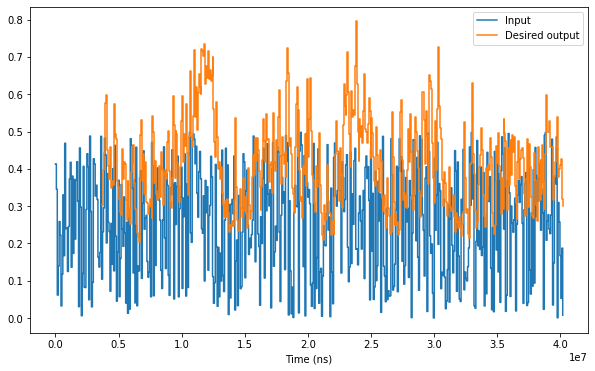

In [9]:
plt.figure(figsize=(10,6))
plt.plot(time_u,u,drawstyle='steps-post',label="Input")
plt.plot(time_y,y,drawstyle='steps-post',label="Desired output")
plt.xlabel("Time (ns)")
plt.legend(loc="best")
plt.show()

In [10]:
(J,S) = net.gen_signal_fast(u)
time_S = net.get_time_list_S(S)

Use bias
0
100
200
300
400
500


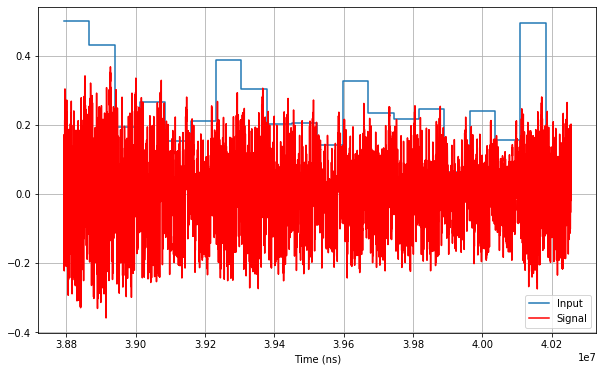

In [11]:
plt.figure(figsize=(10,6))
L = 20
plt.grid(True)
plt.plot(time_u[-L:],u[-L:],drawstyle='steps-post',label="Input")
#plt.plot(time_S[-L*net.Nvirt:],J.flatten()[-L*net.Nvirt:],drawstyle='steps-post',label="Transformed input")
plt.plot(time_S[-L*net.Nvirt:],S[:,:-1].flatten()[-L*net.Nvirt:],'r-',label="Signal")
plt.legend(loc="best")
plt.xlabel("Time (ns)")
#plt.ylim(-0.6,0.6)
plt.show()

In [11]:
T_theta_list = np.logspace(-3,2,15)
amplitude = []
Ntrain = 500
(u,y) = NARMA10(Ntrain)
N_mean = 10
L = 20
for T_t in T_theta_list:
    print(T_t)
    amp_mean = 0
    for i in range(N_mean):
        net = Single_Node_Reservoir_NARMA10(40,T_t,1,0.)
        (J,S) = net.gen_signal(u)
        #M = max(S.flatten()[-L*net.Nvirt:])
        #m = min(S.flatten()[-L*net.Nvirt:])
        #amp_mean += M-m
        amp_mean += np.std(S.flatten())
    amplitude.append(amp_mean/N_mean)

0.001
Use bias
0
100
200
300
400
500
Use bias
0
100
200
300
400
500
Use bias
0
100
200
300
400
500
Use bias
0
100
200
300
400
500
Use bias
0
100
200
300
400
500
Use bias
0
100
200
300
400
500
Use bias
0
100
200
300
400
500
Use bias
0
100
200
300
400
500
Use bias
0
100
200
300
400
500
Use bias
0
100
200
300
400
500
0.0022758459260747888
Use bias
0
100
200
300
400
500
Use bias
0
100
200
300
400
500
Use bias
0
100
200
300
400
500
Use bias
0
100
200
300
400
500
Use bias
0
100
200
300
400
500
Use bias
0
100
200
300
400
500
Use bias
0
100
200
300
400
500
Use bias
0
100
200
300
400
500
Use bias
0
100
200
300
400
500
Use bias
0
100
200
300
400
500
0.005179474679231213
Use bias
0
100
200
300
400
500
Use bias
0
100
200
300
400
500
Use bias
0
100
200
300
400
500
Use bias
0
100
200
300
400
500
Use bias
0
100
200
300
400
500
Use bias
0
100
200
300
400
500
Use bias
0
100
200
300
400
500
Use bias
0
100
200
300
400
500
Use bias
0
100
200
300
400
500
Use bias
0
100
200
300
400
500
0.011787686347935873


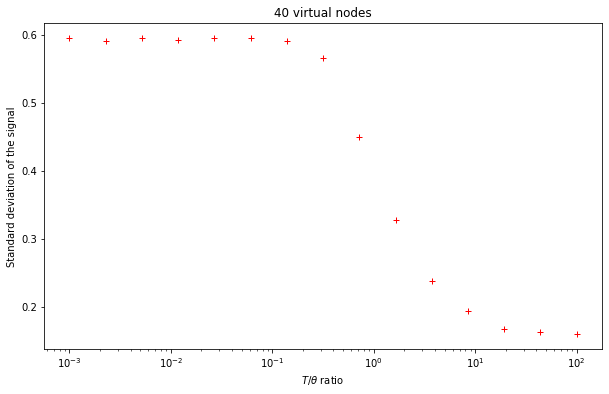

In [12]:
plt.figure(figsize=(10,6))
plt.plot(T_theta_list,amplitude,'r+')
plt.xscale("log")
plt.xlabel(r'$T/\theta$'+" ratio")
plt.ylabel("Standard deviation of the signal")
plt.title("40 virtual nodes")
plt.show()

In [33]:
Ntrain = 500
Nvalid = 200

(u,y) = NARMA10(Ntrain)
(u_valid,y_valid) = NARMA10(Nvalid)

net = Single_Node_Reservoir_NARMA10(400,1e-2,8e-2,0.26)
(J,S) = net.gen_signal(u)
(J_valid,S_valid) = net.gen_signal(u_valid)

Use bias
0
100
200
300
400
500
Use bias
0
100
200


In [34]:
net.train(S,y,S_valid,y_valid)

alpha = 0.0 ; NRMSE (train) = 0.107 ; NRMSE (validation) = 0.59
alpha = 4.641588833612782e-05 ; NRMSE (train) = 0.124 ; NRMSE (validation) = 0.404
alpha = 0.00021544346900318823 ; NRMSE (train) = 0.159 ; NRMSE (validation) = 0.346
alpha = 0.001 ; NRMSE (train) = 0.221 ; NRMSE (validation) = 0.357
alpha = 0.004641588833612777 ; NRMSE (train) = 0.297 ; NRMSE (validation) = 0.398
alpha = 0.021544346900318822 ; NRMSE (train) = 0.35 ; NRMSE (validation) = 0.418
alpha = 0.1 ; NRMSE (train) = 0.377 ; NRMSE (validation) = 0.408
alpha = 0.46415888336127725 ; NRMSE (train) = 0.413 ; NRMSE (validation) = 0.403
alpha = 2.154434690031882 ; NRMSE (train) = 0.514 ; NRMSE (validation) = 0.502
alpha = 10.0 ; NRMSE (train) = 0.672 ; NRMSE (validation) = 0.661
Optimal alpha = 0.00021544346900318823 with NRMSE (validation) = 0.3468199629621966


In [36]:
y_pred_train = net.predict(S)
y_pred_valid = net.predict(S_valid)

In [40]:
Ntest = 200
(u_test,y_test) = NARMA10(Ntest)
(J_test,S_test) = net.gen_signal(u_test)
y_pred_test = net.predict(S_test)

Use bias
0
100
200


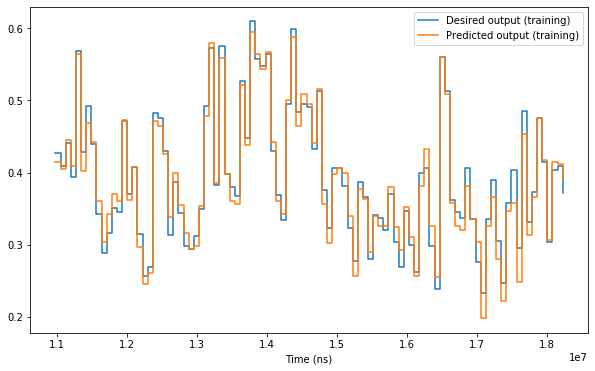

In [37]:
time_y = net.get_time_list_y(y)
plt.figure(figsize=(10,6))
xmin = 100
xmax = 200
plt.plot(time_y[xmin:xmax],y[xmin:xmax],drawstyle='steps-post',label="Desired output (training)")
plt.plot(time_y[xmin:xmax],y_pred_train[xmin:xmax],drawstyle='steps-post',label="Predicted output (training)")
plt.xlabel("Time (ns)")
plt.legend(loc="best")
plt.show()

NRMSE (train) = 0.15944115786093635


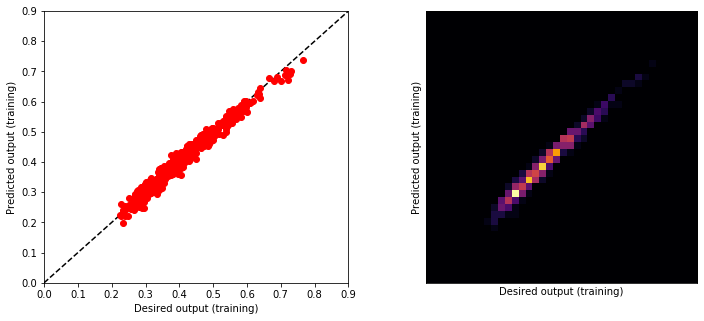

In [38]:
print("NRMSE (train) = "+str(NRMSE_list(y,y_pred_train)))
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(np.linspace(0,1.0),np.linspace(0,1.0), 'k--' )
plt.plot(y,y_pred_train,'ro')
plt.xlabel("Desired output (training)")
plt.ylabel("Predicted output (training)")
plt.xlim(0,0.9)
plt.ylim(0,0.9)
plt.subplot(122)
nbins = int(2*np.sqrt(Ntrain))
H, xedges, yedges  = np.histogram2d(y,y_pred_train,bins = nbins,range=[[0, 1], [0, 1]])
H = H.T
plt.imshow(H,origin='low',cmap='inferno')
plt.xlabel("Desired output (training)")
plt.ylabel("Predicted output (training)")
plt.xticks([],[''])
plt.yticks([],[''])
plt.xlim(0,0.9*nbins)
plt.ylim(0,0.9*nbins)
plt.show()

NRMSE (validation) = 0.3468199629621966


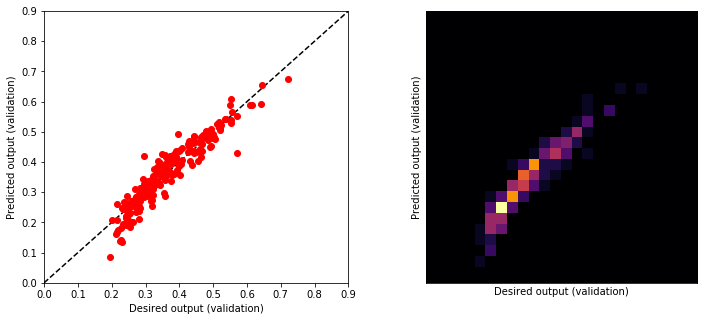

In [39]:
print("NRMSE (validation) = "+str(NRMSE_list(y_valid,y_pred_valid)))
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(np.linspace(0,1.0),np.linspace(0,1.0), 'k--' )
plt.plot(y_valid,y_pred_valid,'ro')
plt.xlabel("Desired output (validation)")
plt.ylabel("Predicted output (validation)")
plt.xlim(0,0.9)
plt.ylim(0,0.9)
plt.subplot(122)
nbins = int(2*np.sqrt(Nvalid))
H, xedges, yedges  = np.histogram2d(y_valid,y_pred_valid,bins = nbins,range=[[0, 1], [0, 1]])
H = H.T
plt.imshow(H,origin='low',cmap='inferno')
plt.xlabel("Desired output (validation)")
plt.ylabel("Predicted output (validation)")
plt.xticks([],[''])
plt.yticks([],[''])
plt.xlim(0,0.9*nbins)
plt.ylim(0,0.9*nbins)
plt.show()

NRMSE (test) = 0.2942713715281637


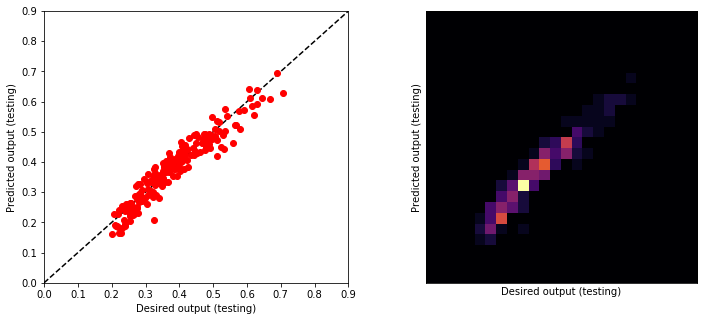

In [41]:
print("NRMSE (test) = "+str(NRMSE_list(y_test,y_pred_test)))
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(np.linspace(0,1.0),np.linspace(0,1.0), 'k--' )
plt.plot(y_test,y_pred_test,'ro')
plt.xlabel("Desired output (testing)")
plt.ylabel("Predicted output (testing)")
plt.xlim(0,0.9)
plt.ylim(0,0.9)
plt.subplot(122)
nbins = int(2*np.sqrt(Ntest))
H, xedges, yedges  = np.histogram2d(y_test,y_pred_test,bins = nbins,range=[[0, 1], [0, 1]])
H = H.T
plt.imshow(H,origin='low',cmap='inferno')
plt.xlabel("Desired output (testing)")
plt.ylabel("Predicted output (testing)")
plt.xticks([],[''])
plt.yticks([],[''])
plt.xlim(0,0.9*nbins)
plt.ylim(0,0.9*nbins)
plt.show()

In [398]:
T_theta_list = np.logspace(-2,0,3)

Ntrain = 500
Nvalid = 200
Ntest = 200

(u,y) = NARMA10(Ntrain)
(u_valid,y_valid) = NARMA10(Nvalid)
(u_test,y_test) = NARMA10(Ntest)

NRMSE_train = []
NRMSE_valid = []
NRMSE_test = []

for T_t in T_theta_list:
    print(T_t)
    net = Single_Node_Reservoir_NARMA10(400,T_t,0.1,0.25)
    
    (J,S) = net.gen_signal(u)
    (J_valid,S_valid) = net.gen_signal(u_valid)
    (J_test,S_test) = net.gen_signal(u_test)
    
    net.train(S,y,S_valid,y_valid)
    
    y_pred_train = net.predict(S)
    y_pred_valid = net.predict(S_valid)
    y_pred_test = net.predict(S_test)
    
    NRMSE_train.append(NRMSE_list(y,y_pred_train))
    NRMSE_valid.append(NRMSE_list(y_valid,y_pred_valid))
    NRMSE_test.append(NRMSE_list(y_test,y_pred_test))

0.01
0
100
200
300
400
500
0
100
200
0
100
200
0.0 0.8151428099340833
0.0001668100537200059 0.46168304805866955
0.0002782559402207126 0.43981021195999837
0.00046415888336127773 0.4271795897494813
0.000774263682681127 0.42323863366288533
0.001291549665014884 0.4266059299697946
0.002154434690031882 0.4351359632801344
0.003593813663804626 0.4464058942251782
0.005994842503189409 0.45853770109790587
0.01 0.47064889287218187
Optimal alpha = 0.000774263682681127 with NRMSE = 0.42323863366288533
0.1
0
100
200
300
400
500
0
100
200
0
100
200
0.0 0.7958528806794705
0.0001668100537200059 0.49231031270089676
0.0002782559402207126 0.4761657842737025
0.00046415888336127773 0.4648382437549877
0.000774263682681127 0.45810403210450357
0.001291549665014884 0.45542825935111764
0.002154434690031882 0.45596324040718744
0.003593813663804626 0.4588318893942734
0.005994842503189409 0.46353878978011287
0.01 0.4700713068867653
Optimal alpha = 0.001291549665014884 with NRMSE = 0.45542825935111764
1.0
0
100
200
3

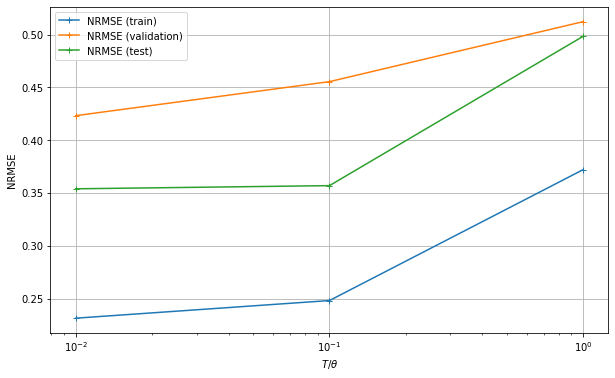

In [399]:
plt.figure(figsize=(10,6))
plt.plot(T_theta_list,NRMSE_train,marker='+',linestyle = '-',label="NRMSE (train)")
plt.plot(T_theta_list,NRMSE_valid,marker='+',linestyle = '-',label="NRMSE (validation)")
plt.plot(T_theta_list,NRMSE_test,marker='+',linestyle = '-',label="NRMSE (test)")
plt.grid(True)
plt.legend(loc="best")
plt.xlabel(r'$T/\theta$')
plt.ylabel("NRMSE")
plt.xscale("log")
plt.show()

In [397]:
Ntrain = 500
Nvalid = 200
Ntest = 200

(u,y) = NARMA10(Ntrain)
(u_valid,y_valid) = NARMA10(Nvalid)
(u_test,y_test) = NARMA10(Ntest)

net = Single_Node_Reservoir_NARMA10(400,1,0.1,0.25)

J = net.gen_signal_without_SPN(u)
J_valid = net.gen_signal_without_SPN(u_valid)
J_test = net.gen_signal_without_SPN(u_test)

net.train_without_SPN(S,y,S_valid,y_valid)

y_pred_train = net.predict(J)
y_pred_valid = net.predict(J_valid)
y_pred_test = net.predict(J_test)

print("NRMSE (train) = "+str(NRMSE_list(y,y_pred_train)))
print("NRMSE (validation) = "+str(NRMSE_list(y_valid,y_pred_valid)))
print("NRMSE (test) = "+str(NRMSE_list(y_test,y_pred_test)))

0
100
200
300
400
500
0
100
200
0
100
200
0.0 26.84288749015407
1e-09 10.065692101526569
1e-08 4.3051060201430476
1e-07 2.0913203641670592
1e-06 1.5082580737165907
1e-05 1.2783154758702036
0.0001 1.2013564706315885
0.001 1.1842013457293283
0.01 1.1860298728789072
0.1 1.196799803097186
Optimal alpha = 0.001 with NRMSE = 1.1842013457293283
NRMSE (train) = 2.6960246036422726
NRMSE (validation) = 2.2783416652608333
NRMSE (test) = 2.9743515021971954


In [472]:
m0_theta_list = np.logspace(-1.5,-0.5,5)

Ntrain = 500
Nvalid = 200
Ntest = 200

(u,y) = NARMA10(Ntrain)
(u_valid,y_valid) = NARMA10(Nvalid)
(u_test,y_test) = NARMA10(Ntest)

NRMSE_train_list = []
NRMSE_valid_list = []
NRMSE_test_list = []

N = 10

for m0 in m0_theta_list:
    print(m0)
    NRMSE_train = 0
    NRMSE_valid = 0
    NRMSE_test = 0
    
    for i in range(N):
        net = Single_Node_Reservoir_NARMA10(400,1e-3,m0,0.25)

        (J,S) = net.gen_signal(u)
        (J_valid,S_valid) = net.gen_signal(u_valid)
        (J_test,S_test) = net.gen_signal(u_test)

        net.train(S,y,S_valid,y_valid)

        y_pred_train = net.predict(S)
        y_pred_valid = net.predict(S_valid)
        y_pred_test = net.predict(S_test)
        
        NRMSE_train += NRMSE_list(y,y_pred_train)
        NRMSE_valid += NRMSE_list(y_valid,y_pred_valid)
        NRMSE_test += NRMSE_list(y_test,y_pred_test)
        
    NRMSE_train_list.append(NRMSE_train/N)
    NRMSE_valid_list.append(NRMSE_valid/N)
    NRMSE_test_list.append(NRMSE_test/N)

0.03162277660168379
Use bias
0
100
200
300
400
500
Use bias
0
100
200
Use bias
0
100
200
0.0 1.0710718354531676
2.782559402207126e-05 0.5506831761630295
7.742636826811278e-05 0.4534049631104356
0.00021544346900318823 0.39221714226318427
0.0005994842503189409 0.36305526554163164
0.0016681005372000592 0.3560044760343921
0.004641588833612777 0.3617887148610695
0.012915496650148827 0.3761690177874431
0.03593813663804626 0.3994866698333995
0.1 0.44127354137020175
Optimal alpha = 0.0016681005372000592 with NRMSE = 0.3560044760343921
Use bias
0
100
200
300
400
500
Use bias
0
100
200
Use bias
0
100
200
0.0 0.948113773482925
2.782559402207126e-05 0.5604971425894859
7.742636826811278e-05 0.4701764497582606
0.00021544346900318823 0.40822593310940525
0.0005994842503189409 0.37410900077060577
0.0016681005372000592 0.36376344052608545
0.004641588833612777 0.36903020668988135
0.012915496650148827 0.38369088820041886
0.03593813663804626 0.40596336926247045
0.1 0.4448723670729816
Optimal alpha = 0.0016

Use bias
0
100
200
300
400
500
Use bias
0
100
200
Use bias
0
100
200
0.0 1.0127799102898338
2.782559402207126e-05 0.591352864382537
7.742636826811278e-05 0.4740359216051993
0.00021544346900318823 0.39827914694079086
0.0005994842503189409 0.3651466653334589
0.0016681005372000592 0.3585749598162839
0.004641588833612777 0.36294438600031065
0.012915496650148827 0.3737988917776046
0.03593813663804626 0.3904395517282197
0.1 0.41426925980383894
Optimal alpha = 0.0016681005372000592 with NRMSE = 0.3585749598162839
Use bias
0
100
200
300
400
500
Use bias
0
100
200
Use bias
0
100
200
0.0 0.8419008539907867
2.782559402207126e-05 0.5323505494492698
7.742636826811278e-05 0.45130600216070604
0.00021544346900318823 0.39120871886075814
0.0005994842503189409 0.35986518126964495
0.0016681005372000592 0.3522768256172403
0.004641588833612777 0.3577659336284312
0.012915496650148827 0.37005582766179
0.03593813663804626 0.38692658172265876
0.1 0.4109345005925902
Optimal alpha = 0.0016681005372000592 with NRM

Use bias
0
100
200
300
400
500
Use bias
0
100
200
Use bias
0
100
200
0.0 0.8045597047044613
2.782559402207126e-05 0.5851252592549474
7.742636826811278e-05 0.5122179031619511
0.00021544346900318823 0.4584825456913824
0.0005994842503189409 0.4228231553989901
0.0016681005372000592 0.4047731665543421
0.004641588833612777 0.40717478029726173
0.012915496650148827 0.4262014844744281
0.03593813663804626 0.4480260125657396
0.1 0.4658293469424239
Optimal alpha = 0.0016681005372000592 with NRMSE = 0.4047731665543421
Use bias
0
100
200
300
400
500
Use bias
0
100
200
Use bias
0
100
200
0.0 0.8589397580395243
2.782559402207126e-05 0.6104766709260706
7.742636826811278e-05 0.5128515289856223
0.00021544346900318823 0.44353434906030437
0.0005994842503189409 0.40468457854002654
0.0016681005372000592 0.38946720345977354
0.004641588833612777 0.3969312591982614
0.012915496650148827 0.4220550255297805
0.03593813663804626 0.44856844486128816
0.1 0.4687808127584481
Optimal alpha = 0.0016681005372000592 with NR

400
500
Use bias
0
100
200
Use bias
0
100
200
0.0 0.9557596780662079
2.782559402207126e-05 0.7812056352626101
7.742636826811278e-05 0.6902557851173456
0.00021544346900318823 0.606276114333414
0.0005994842503189409 0.5388244986360982
0.0016681005372000592 0.4954688610877599
0.004641588833612777 0.47872941693518967
0.012915496650148827 0.4892613236771894
0.03593813663804626 0.5241390437506118
0.1 0.5686652071923577
Optimal alpha = 0.004641588833612777 with NRMSE = 0.47872941693518967
Use bias
0
100
200
300
400
500
Use bias
0
100
200
Use bias
0
100
200
0.0 1.1271850399054812
2.782559402207126e-05 0.8985147487063586
7.742636826811278e-05 0.7898224472760059
0.00021544346900318823 0.6853308054644514
0.0005994842503189409 0.5962911029499256
0.0016681005372000592 0.5338186930718881
0.004641588833612777 0.5056072438387046
0.012915496650148827 0.5108230886097055
0.03593813663804626 0.5428632498838615
0.1 0.5886859135504892
Optimal alpha = 0.004641588833612777 with NRMSE = 0.5056072438387046


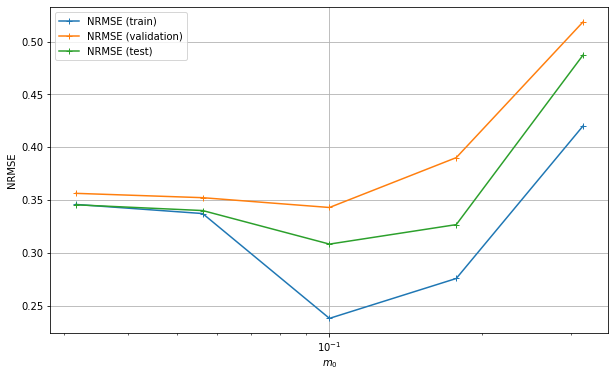

In [473]:
plt.figure(figsize=(10,6))
plt.plot(m0_theta_list,NRMSE_train_list,marker='+',linestyle = '-',label="NRMSE (train)")
plt.plot(m0_theta_list,NRMSE_valid_list,marker='+',linestyle = '-',label="NRMSE (validation)")
plt.plot(m0_theta_list,NRMSE_test_list,marker='+',linestyle = '-',label="NRMSE (test)")
plt.grid(True)
plt.legend(loc="best")
plt.xlabel(r'$m_0$')
plt.ylabel("NRMSE")
plt.xscale("log")
plt.show()

$T/\theta$ must be very low! Which means that the "memory" is useless when there is a feedback... The network doesn't work when we use J instead of S (without SPN) which tends to show that the crucial aspect of the SPN in nonlinearity (but not memory).

In [474]:
gamma_theta_list = np.arange(0.2,0.33,0.02)

Ntrain = 500
Nvalid = 200
Ntest = 200

(u,y) = NARMA10(Ntrain)
(u_valid,y_valid) = NARMA10(Nvalid)
(u_test,y_test) = NARMA10(Ntest)

NRMSE_train_list = []
NRMSE_valid_list = []
NRMSE_test_list = []

N = 10

for gamma in gamma_theta_list:
    print(gamma)
    NRMSE_train = 0
    NRMSE_valid = 0
    NRMSE_test = 0
    
    for i in range(N):
        net = Single_Node_Reservoir_NARMA10(400,1e-3,1e-1,gamma)

        (J,S) = net.gen_signal(u)
        (J_valid,S_valid) = net.gen_signal(u_valid)
        (J_test,S_test) = net.gen_signal(u_test)

        net.train(S,y,S_valid,y_valid)

        y_pred_train = net.predict(S)
        y_pred_valid = net.predict(S_valid)
        y_pred_test = net.predict(S_test)
        
        NRMSE_train += NRMSE_list(y,y_pred_train)
        NRMSE_valid += NRMSE_list(y_valid,y_pred_valid)
        NRMSE_test += NRMSE_list(y_test,y_pred_test)
        
    NRMSE_train_list.append(NRMSE_train/N)
    NRMSE_valid_list.append(NRMSE_valid/N)
    NRMSE_test_list.append(NRMSE_test/N)

0.2
Use bias
0
100
200
300
400
500
Use bias
0
100
200
Use bias
0
100
200
0.0 1.0166331611250263
2.782559402207126e-05 0.6129554245572488
7.742636826811278e-05 0.5479206943977755
0.00021544346900318823 0.5021694871810102
0.0005994842503189409 0.4802410903367467
0.0016681005372000592 0.48038914028661367
0.004641588833612777 0.5043738693275017
0.012915496650148827 0.5617567968447745
0.03593813663804626 0.6572580951347101
0.1 0.7603248011183728
Optimal alpha = 0.0005994842503189409 with NRMSE = 0.4802410903367467
Use bias
0
100
200
300
400
500
Use bias
0
100
200
Use bias
0
100
200
0.0 1.090570205411899
2.782559402207126e-05 0.6182970115475368
7.742636826811278e-05 0.5360310745863738
0.00021544346900318823 0.4882876587721992
0.0005994842503189409 0.47491259375322115
0.0016681005372000592 0.48037209244096696
0.004641588833612777 0.5013312661952577
0.012915496650148827 0.5539223360301372
0.03593813663804626 0.6495593163643054
0.1 0.7563503529653912
Optimal alpha = 0.0005994842503189409 with N

100
200
300
400
500
Use bias
0
100
200
Use bias
0
100
200
0.0 1.0235342023981888
2.782559402207126e-05 0.5947490485976354
7.742636826811278e-05 0.5260023044381809
0.00021544346900318823 0.48053175990078073
0.0005994842503189409 0.4545866135775869
0.0016681005372000592 0.4436414704440787
0.004641588833612777 0.44256753120913417
0.012915496650148827 0.45142954707326205
0.03593813663804626 0.48233035614469666
0.1 0.5539882020121611
Optimal alpha = 0.004641588833612777 with NRMSE = 0.44256753120913417
Use bias
0
100
200
300
400
500
Use bias
0
100
200
Use bias
0
100
200
0.0 0.983646285572051
2.782559402207126e-05 0.5530030616138729
7.742636826811278e-05 0.48852719827826985
0.00021544346900318823 0.4508441697065476
0.0005994842503189409 0.43287188990233305
0.0016681005372000592 0.42723864659935057
0.004641588833612777 0.42982617430596987
0.012915496650148827 0.4422710197095183
0.03593813663804626 0.4749200498295486
0.1 0.5485002700372431
Optimal alpha = 0.0016681005372000592 with NRMSE = 0.4

Use bias
0
100
200
300
400
500
Use bias
0
100
200
Use bias
0
100
200
0.0 0.7059846828718527
2.782559402207126e-05 0.5058518317768489
7.742636826811278e-05 0.4305495016807636
0.00021544346900318823 0.3796359170262961
0.0005994842503189409 0.3597428503016441
0.0016681005372000592 0.3664541959325844
0.004641588833612777 0.3879798845248553
0.012915496650148827 0.406846810132628
0.03593813663804626 0.41414172540070326
0.1 0.4145766053169045
Optimal alpha = 0.0005994842503189409 with NRMSE = 0.3597428503016441
Use bias
0
100
200
300
400
500
Use bias
0
100
200
Use bias
0
100
200
0.0 0.7123973846202303
2.782559402207126e-05 0.5344564205057996
7.742636826811278e-05 0.45689769554372306
0.00021544346900318823 0.39487529990983405
0.0005994842503189409 0.36668056260948656
0.0016681005372000592 0.37421923364812104
0.004641588833612777 0.3954899156507018
0.012915496650148827 0.41122157310571855
0.03593813663804626 0.4151030658124214
0.1 0.4115704001951768
Optimal alpha = 0.0005994842503189409 with NR

100
200
300
400
500
Use bias
0
100
200
Use bias
0
100
200
0.0 0.7251779858485569
2.782559402207126e-05 0.5896822376025513
7.742636826811278e-05 0.5030681668119719
0.00021544346900318823 0.4291077956546497
0.0005994842503189409 0.38300394799495385
0.0016681005372000592 0.3665538256603204
0.004641588833612777 0.3746561013528545
0.012915496650148827 0.3946010879819116
0.03593813663804626 0.4090676126107721
0.1 0.4127129158207422
Optimal alpha = 0.0016681005372000592 with NRMSE = 0.3665538256603204
Use bias
0
100
200
300
400
500
Use bias
0
100
200
Use bias
0
100
200
0.0 0.7247523817416336
2.782559402207126e-05 0.6204947807638351
7.742636826811278e-05 0.5368506965233206
0.00021544346900318823 0.44887639193234297
0.0005994842503189409 0.37710989724563876
0.0016681005372000592 0.3318822392466026
0.004641588833612777 0.3165426209090507
0.012915496650148827 0.3276995419845025
0.03593813663804626 0.35341446709679863
0.1 0.37664668029525883
Optimal alpha = 0.004641588833612777 with NRMSE = 0.3165

0.0016681005372000592 1.0198651492935376
0.004641588833612777 0.9090282982476918
0.012915496650148827 0.7925833197200363
0.03593813663804626 0.6908464055036041
0.1 0.5975934169561956
Optimal alpha = 0.1 with NRMSE = 0.5975934169561956
Use bias
0
100
200
300
400
500
Use bias
0
100
200
Use bias
0
100
200
0.0 1.0703623999693503
2.782559402207126e-05 1.068647545908539
7.742636826811278e-05 1.0656308425253491
0.00021544346900318823 1.0574971324955116
0.0005994842503189409 1.0366940274830059
0.0016681005372000592 0.9898653629502804
0.004641588833612777 0.9082372088591216
0.012915496650148827 0.8081418181208967
0.03593813663804626 0.7090056796849789
0.1 0.6116034379334684
Optimal alpha = 0.1 with NRMSE = 0.6116034379334684
Use bias
0
100
200
300
400
500
Use bias
0
100
200
Use bias
0
100
200
0.0 1.1716747057011687
2.782559402207126e-05 1.1705794952411357
7.742636826811278e-05 1.1686414419776106
0.00021544346900318823 1.1633423557671452
0.0005994842503189409 1.1492795004375793
0.001668100537200

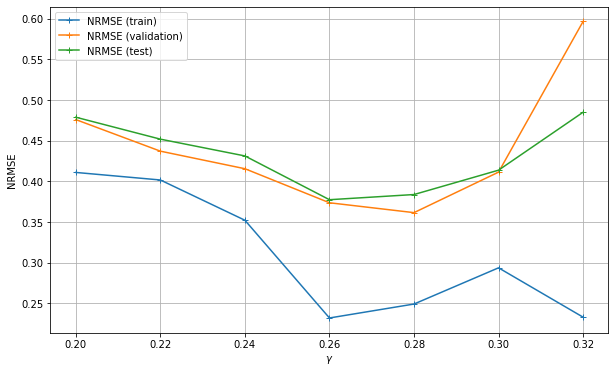

In [475]:
plt.figure(figsize=(10,6))
plt.plot(gamma_theta_list,NRMSE_train_list,marker='+',linestyle = '-',label="NRMSE (train)")
plt.plot(gamma_theta_list,NRMSE_valid_list,marker='+',linestyle = '-',label="NRMSE (validation)")
plt.plot(gamma_theta_list,NRMSE_test_list,marker='+',linestyle = '-',label="NRMSE (test)")
plt.grid(True)
plt.legend(loc="best")
plt.xlabel(r'$\gamma$')
plt.ylabel("NRMSE")
#plt.xscale("log")
plt.show()

In [476]:
bias_list = [True,False]

Ntrain = 500
Nvalid = 200
Ntest = 200

(u,y) = NARMA10(Ntrain)
(u_valid,y_valid) = NARMA10(Nvalid)
(u_test,y_test) = NARMA10(Ntest)

NRMSE_train_list = []
NRMSE_valid_list = []
NRMSE_test_list = []

N = 10

for use_bias in bias_list:
    print(use_bias)
    NRMSE_train = 0
    NRMSE_valid = 0
    NRMSE_test = 0
    
    for i in range(N):
        net = Single_Node_Reservoir_NARMA10(400,1e-3,1e-1,0.25,bias=use_bias)

        (J,S) = net.gen_signal(u)
        (J_valid,S_valid) = net.gen_signal(u_valid)
        (J_test,S_test) = net.gen_signal(u_test)

        net.train(S,y,S_valid,y_valid)

        y_pred_train = net.predict(S)
        y_pred_valid = net.predict(S_valid)
        y_pred_test = net.predict(S_test)
        
        NRMSE_train += NRMSE_list(y,y_pred_train)
        NRMSE_valid += NRMSE_list(y_valid,y_pred_valid)
        NRMSE_test += NRMSE_list(y_test,y_pred_test)
        
    NRMSE_train_list.append(NRMSE_train/N)
    NRMSE_valid_list.append(NRMSE_valid/N)
    NRMSE_test_list.append(NRMSE_test/N)
    
print(NRMSE_train_list)
print(NRMSE_valid_list)
print(NRMSE_test_list)

True
Use bias
0
100
200
300
400
500
Use bias
0
100
200
Use bias
0
100
200
0.0 0.8248236604973319
2.782559402207126e-05 0.6208620485608646
7.742636826811278e-05 0.5482067324786423
0.00021544346900318823 0.48955481289015607
0.0005994842503189409 0.455716878484202
0.0016681005372000592 0.449118801905103
0.004641588833612777 0.456096733492725
0.012915496650148827 0.4633243879592589
0.03593813663804626 0.4683567631506404
0.1 0.4733270791021678
Optimal alpha = 0.0016681005372000592 with NRMSE = 0.449118801905103
Use bias
0
100
200
300
400
500
Use bias
0
100
200
Use bias
0
100
200
0.0 0.8147763528762548
2.782559402207126e-05 0.5518318917606587
7.742636826811278e-05 0.4817676918414601
0.00021544346900318823 0.4464773154049087
0.0005994842503189409 0.43997322279157447
0.0016681005372000592 0.4475677206275184
0.004641588833612777 0.4571876416283392
0.012915496650148827 0.46504913567282213
0.03593813663804626 0.4707123553995281
0.1 0.47492218849052575
Optimal alpha = 0.0005994842503189409 with NR

0.0005994842503189409 0.39519391294262735
0.0016681005372000592 0.4012501190943644
0.004641588833612777 0.4346938114796549
0.012915496650148827 0.47268833144767053
0.03593813663804626 0.5029247115959096
0.1 0.5265320325014154
Optimal alpha = 0.0005994842503189409 with NRMSE = 0.39519391294262735
0
100
200
300
400
500
0
100
200
0
100
200
0.0 0.6552553398626811
2.782559402207126e-05 0.48143935565837437
7.742636826811278e-05 0.43421224618379267
0.00021544346900318823 0.4027647566777182
0.0005994842503189409 0.38772342258395204
0.0016681005372000592 0.3934339282547954
0.004641588833612777 0.42271351076613456
0.012915496650148827 0.4632429187614497
0.03593813663804626 0.49826043613855364
0.1 0.5264521381363045
Optimal alpha = 0.0005994842503189409 with NRMSE = 0.38772342258395204
0
100
200
300
400
500
0
100
200
0
100
200
0.0 0.8023100589627956
2.782559402207126e-05 0.572316639263305
7.742636826811278e-05 0.4909093022563696
0.00021544346900318823 0.439397301459631
0.0005994842503189409 0.420

In [478]:
beta_prime_list = np.logspace(1,2,5)

Ntrain = 500
Nvalid = 200
Ntest = 200

(u,y) = NARMA10(Ntrain)
(u_valid,y_valid) = NARMA10(Nvalid)
(u_test,y_test) = NARMA10(Ntest)

NRMSE_train_list = []
NRMSE_valid_list = []
NRMSE_test_list = []

N = 10

for bp in beta_prime_list:
    print(bp)
    NRMSE_train = 0
    NRMSE_valid = 0
    NRMSE_test = 0
    
    for i in range(N):
        net = Single_Node_Reservoir_NARMA10(400,1e-3,1e-1,0.25,beta_prime=bp)

        (J,S) = net.gen_signal(u)
        (J_valid,S_valid) = net.gen_signal(u_valid)
        (J_test,S_test) = net.gen_signal(u_test)

        net.train(S,y,S_valid,y_valid)

        y_pred_train = net.predict(S)
        y_pred_valid = net.predict(S_valid)
        y_pred_test = net.predict(S_test)
        
        NRMSE_train += NRMSE_list(y,y_pred_train)
        NRMSE_valid += NRMSE_list(y_valid,y_pred_valid)
        NRMSE_test += NRMSE_list(y_test,y_pred_test)
        
    NRMSE_train_list.append(NRMSE_train/N)
    NRMSE_valid_list.append(NRMSE_valid/N)
    NRMSE_test_list.append(NRMSE_test/N)

10.0
Use bias
0
100
200
300
400
500
Use bias
0
100
200
Use bias
0
100
200
0.0 0.617920633604217
2.782559402207126e-05 0.4502103965623859
7.742636826811278e-05 0.40538632833481064
0.00021544346900318823 0.3799783095439174
0.0005994842503189409 0.386419281673574
0.0016681005372000592 0.41756382214611526
0.004641588833612777 0.44855970265240797
0.012915496650148827 0.46537891073905313
0.03593813663804626 0.47206237088590547
0.1 0.4747336254771883
Optimal alpha = 0.00021544346900318823 with NRMSE = 0.3799783095439174
Use bias
0
100
200
300
400
500
Use bias
0
100
200
Use bias
0
100
200
0.0 0.8224362487688699
2.782559402207126e-05 0.5872718352172335
7.742636826811278e-05 0.5199212962262378
0.00021544346900318823 0.47391181278095074
0.0005994842503189409 0.45423619375319957
0.0016681005372000592 0.4569256676137079
0.004641588833612777 0.4664457703191897
0.012915496650148827 0.47157170474139204
0.03593813663804626 0.47240397696254166
0.1 0.4712418162191065
Optimal alpha = 0.0005994842503189409

0.0016681005372000592 2.3252107021779786
0.004641588833612777 2.1839376221897355
0.012915496650148827 1.9568245497653347
0.03593813663804626 1.8009968728485584
0.1 1.8418694032811418
Optimal alpha = 0.03593813663804626 with NRMSE = 1.8009968728485584
Use bias
0
100
200
300
400
500
Use bias
0
100
200
Use bias
0
100
200
0.0 6.236425554281578
2.782559402207126e-05 6.225871614137241
7.742636826811278e-05 6.207218137920638
0.00021544346900318823 6.156364862018585
0.0005994842503189409 6.022525492320885
0.0016681005372000592 5.700734059865337
0.004641588833612777 5.071441988923419
0.012915496650148827 4.226617415146208
0.03593813663804626 3.5296743321077724
0.1 3.147440436355809
Optimal alpha = 0.1 with NRMSE = 3.147440436355809
Use bias
0
100
200
300
400
500
Use bias
0
100
200
Use bias
0
100
200
0.0 4.413856820023065
2.782559402207126e-05 4.411956238922648
7.742636826811278e-05 4.408576079953638
0.00021544346900318823 4.399222449983043
0.0005994842503189409 4.373590455790924
0.0016681005372

200
Use bias
0
100
200
0.0 2.3887980737343537
2.782559402207126e-05 2.3824724362561738
7.742636826811278e-05 2.3713021490071027
0.00021544346900318823 2.340921640927836
0.0005994842503189409 2.261617068430832
0.0016681005372000592 2.0775241073071578
0.004641588833612777 1.7807162385158875
0.012915496650148827 1.7258541667246134
0.03593813663804626 2.197560256852773
0.1 2.6637728104348146
Optimal alpha = 0.012915496650148827 with NRMSE = 1.7258541667246134
Use bias
0
100
200
300
400
500
Use bias
0
100
200
Use bias
0
100
200
0.0 2.5302531524413587
2.782559402207126e-05 2.530137022143306
7.742636826811278e-05 2.529930668837126
0.00021544346900318823 2.529360860961093
0.0005994842503189409 2.527808476932984
0.0016681005372000592 2.523729502686881
0.004641588833612777 2.513953599884827
0.012915496650148827 2.494860516547388
0.03593813663804626 2.4685504239803877
0.1 2.443229980574522
Optimal alpha = 0.1 with NRMSE = 2.443229980574522
Use bias
0
100
200
300
400
500
Use bias
0
100
200
Use bia

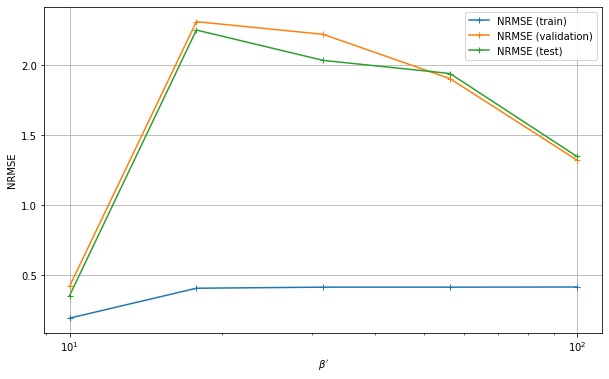

In [479]:
plt.figure(figsize=(10,6))
plt.plot(beta_prime_list,NRMSE_train_list,marker='+',linestyle = '-',label="NRMSE (train)")
plt.plot(beta_prime_list,NRMSE_valid_list,marker='+',linestyle = '-',label="NRMSE (validation)")
plt.plot(beta_prime_list,NRMSE_test_list,marker='+',linestyle = '-',label="NRMSE (test)")
plt.grid(True)
plt.legend(loc="best")
plt.xlabel(r'$\beta^\prime$')
plt.ylabel("NRMSE")
plt.xscale("log")
plt.show()